# Creación de un índicador financiero utilizando PCA

En este notebook utilizaremos el análisis de componentes principales con el fin de resumir el comportamiento de 5 índices accionarios en un sólo índice. Este nuevo índice corresponderá al primer componente principal de nuestra matriz de datos.

Utilizando el archivo ```indices.csv``` realice lo siguiente:

* Utilizando el primer componente principal obtenga un indicador financiero.

* Obtenga además la contribución de cada componente a la variabilidad total de los datos, así como la variabilidad acumulada.

* Programe una función para cambiar los precios de los índices accionarios y el indicador financiero a una base 100 (HABRÁ PENALIZACIÓN SI UTILIZA LOOPS)

* Utilizando una gráfica, compare el comportamiento del índice obtenido con PCA y los 5 índices accionarios (estas series deben de compararse en base 100)

## Base 100

Suponga que se tiene una serie de tiempo $\{X\}_t$ y se desea reexpresar los niveles de esta serie utilizando una nueva serie $\{Y\}_t$ tal que $Y_0 = 100$.

Para crear $\{Y\}_t$, lo único que necesitamos es asegurarnos de que se cumplan las siguientes condiciones

$$
\Delta Y_{t} = \dfrac{Y_{t}} {Y_{t-1}} - 1 = \Delta X_{t} = \dfrac{X_{t}} {X_{t-1}} - 1
$$

Es decir, ambas series deben de tener los mismos cambios porcentuales.

In [1]:
#Escriba aquí su código
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#Lee los datos
datos = np.genfromtxt('../datos/indices.csv', skip_header = 1, delimiter = ',')

In [18]:
def estandariza_datos(datos):
    '''
    Función para estandarizar los datos de un numpy array
    
    ENTRADA
    datos: Numpy array (matriz)
    
    SALIDA
    array datos con datos estandarizados (media cero y desviación estándar 1)
    '''
    
    #Se obtiene la media de cada columna
    medias = datos.mean(axis = 0)
    
    #Desviaciones estándar
    desv = datos.std(axis = 0)
    
    #Se normalizan los datos (recuerde el concepto de BROADCASTING)
    datos_norm = (datos - medias) / desv
    
    return datos_norm

In [19]:
def pca(datos_norm):
    '''
    Función realizar el PCA
    
    ENTRADA:
    datos_norm: Numpy array (matriz) de datos normalizados
    
    SALIDA:
    mat_comp_prin. numpy array que representa la matriz de componentes
    principales
    
    eig_vect. numpy array que representa la matriz cuya i-ésima columna es
    el vector característico correspondiente al i-ésimo valor característico
    
    eig_vals. numpy array que contiene los valores característicos ordenados
    de mayor a menor
    '''
    
    #calcula la matriz de correlaciones
    #OJO con el parámetro rowvar
    mat_cor = np.corrcoef(datos_norm, rowvar = False)

    #Calcula valores y vectores característicos de la matriz de correlaciones
    #ver ayuda de np.linalg.eig
    eig_vals, eig_vect = np.linalg.eig(mat_cor)
    
    #Ordena los valores característicos de mayor a menor
    indices_orden = eig_vals.argsort()[::-1]
    eig_vals = eig_vals[indices_orden]
    
    #Ordena columnas
    eig_vect = eig_vect[:, indices_orden]

    #calcula la matriz de componentes principales
    mat_comp_prin = np.matmul(datos_norm, eig_vect)
    
    return mat_comp_prin, eig_vect, eig_vals

In [20]:
#Estandariza datos
datos_norm = estandariza_datos(datos)
mat_comp_prin, eig_vect, eig_vals = pca(datos_norm)

print(mat_comp_prin[0:10,:])
print('-'*50)
print(eig_vect)
print('-'*50)
print(eig_vals)

[[ 2.78234277  0.01323181 -0.10690829  0.07250492 -0.05499271]
 [ 2.68696252 -0.03859059 -0.11953852  0.09330531 -0.03464046]
 [ 2.57126042  0.11971443 -0.14001449  0.0814002  -0.03934901]
 [ 2.59941166  0.14035875 -0.10326143  0.08228291 -0.04104401]
 [ 2.52814408  0.11418067 -0.11658126  0.07622457 -0.03333344]
 [ 2.49006807  0.1153959  -0.10628635  0.07741261 -0.02522947]
 [ 2.51450218  0.07129047 -0.10674933  0.05964128 -0.01947515]
 [ 2.38131007  0.10005399 -0.13854608  0.07449715 -0.0179399 ]
 [ 2.32327481  0.12099279 -0.13433742  0.08041036 -0.01039473]
 [ 2.29226929  0.18907647 -0.09442472  0.08991216 -0.00628806]]
--------------------------------------------------
[[-0.46513838 -0.22990151  0.37347085  0.60942919 -0.46894261]
 [-0.36086469  0.92742203  0.09322347 -0.0062297  -0.03058801]
 [-0.46640956 -0.21640612  0.20050136 -0.78244774 -0.2884532 ]
 [-0.46422526 -0.09411928 -0.87302085  0.10046601 -0.0581175 ]
 [-0.46944647 -0.17704131  0.22240213  0.07898967  0.8322105 ]]
--

In [21]:
prop_var = eig_vals.cumsum() / eig_vals.sum()

for i in range(len(prop_var)):
    print('Hasta el componente', i + 1, ' se tiene un ', round(100*prop_var[i],2), ' % de la variabilidad')

Hasta el componente 1  se tiene un  89.04  % de la variabilidad
Hasta el componente 2  se tiene un  98.81  % de la variabilidad
Hasta el componente 3  se tiene un  99.75  % de la variabilidad
Hasta el componente 4  se tiene un  99.97  % de la variabilidad
Hasta el componente 5  se tiene un  100.0  % de la variabilidad


In [24]:
def base_100(serie): 
    '''
    Función para obtener un índice base 100 dada una serie
    
    ENTRADA
    serie: numpy array de dimensión 1
    
    SALIDA
    numpy array de dimensión 1 cuya primera entrada es igual a 100
    '''
    
    x0 = 100
    p0 = serie[0]
    
    return (x0 / p0) * serie

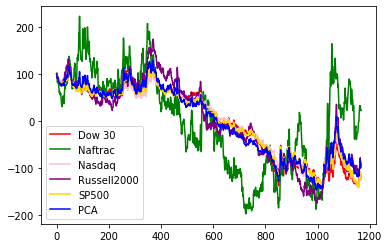

In [26]:
n_indices = datos.shape[1]
#colores: dow30,naftrac,nasdaq,russell2000,sp500
colores = ['red','green', 'pink', 'purple', 'gold']
nom_serie = ['Dow 30', 'Naftrac', 'Nasdaq', 'Russell2000', 'SP500']

for i in range(n_indices):
    indice = base_100(datos_norm[:, i])
    plt.plot(indice,color = colores[i], label = nom_serie[i])
    
indice_pca = base_100(mat_comp_prin[:, 0])
plt.plot(indice_pca, color = 'blue', label ='PCA')
plt.legend()
plt.show()